1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

      fun: -1.0316284534898557
 hess_inv: array([[ 0.12941905, -0.00790844],
       [-0.00790844,  0.06166136]])
      jac: array([ 0.00000000e+00, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.08984201, -0.71265645])
      fun: -1.031628453489866
 hess_inv: array([[ 0.12941902, -0.0079083 ],
       [-0.0079083 ,  0.06166136]])
      jac: array([0.00000000e+00, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([-0.08984202,  0.71265644])
The global minimun is in:  [-0.08984202  0.71265644]  and the value of the value of the function is:  -1.031628453489866
      fun: -1.031628453489866
 hess_inv: array([[ 0.12941902, -0.0079083 ],
       [-0.0079083 ,  0.06166136]])
      jac: array([0.00000000e+00, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     n

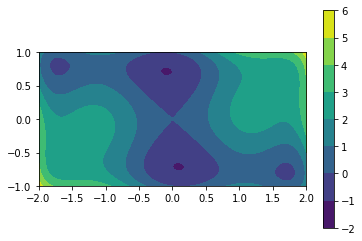

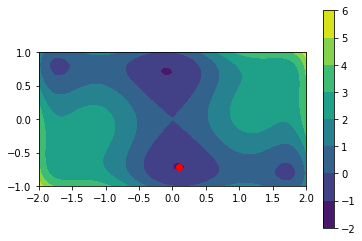

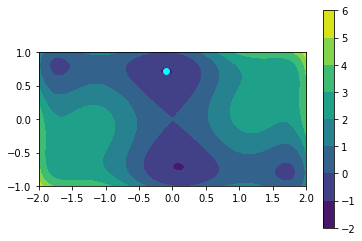

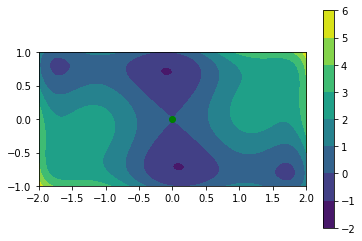

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from pylab import imshow
%matplotlib inline

def f(x):
    return (4-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(x, y)
zz = f([xx, yy])

h = plt.contourf(x, y, zz)
plt.axis('scaled')
plt.colorbar()
plt.imshow(zz)

#looking at the plot, we can figure out thata there are two possibly initial guesses

#start with initial guess 1
ig1 = np.array((0, -0.5))
solution1 = optimize.minimize(f, ig1)
plt.figure()
h = plt.contourf(x, y, zz)
plt.axis('scaled')
plt.colorbar()
plt.imshow(zz)
plt.scatter(solution1.x[0], solution1.x[1], color = 'r')

print(solution1)

#now try with initial guess 2
ig2 = np.array((0, 0.5))
solution2 = optimize.minimize(f, ig2)
plt.figure()
h = plt.contourf(x, y, zz)
plt.axis('scaled')
plt.colorbar()
plt.imshow(zz)
plt.scatter(solution2.x[0], solution2.x[1], color = 'cyan')

print(solution2)

#now we realize where the minima actually is
if (solution1.fun<solution2.fun):
    print('The global minimun is in: ',solution1.x, ' and the value of the value of the function is: ', solution1.fun)
else:
    print('The global minimun is in: ',solution2.x, ' and the value of the value of the function is: ', solution2.fun )
    
#try with initial guess (0, 0):

ig3 = np.array((0, 0))
solution3 = optimize.minimize(f, ig3)
plt.figure()
h = plt.contourf(x, y, zz)
plt.axis('scaled')
plt.colorbar()
plt.imshow(zz)
plt.scatter(solution3.x[0], solution3.x[1], color = 'green')

print(solution2)

#as we can see, the method does not reach the global minima and stays in a loc

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

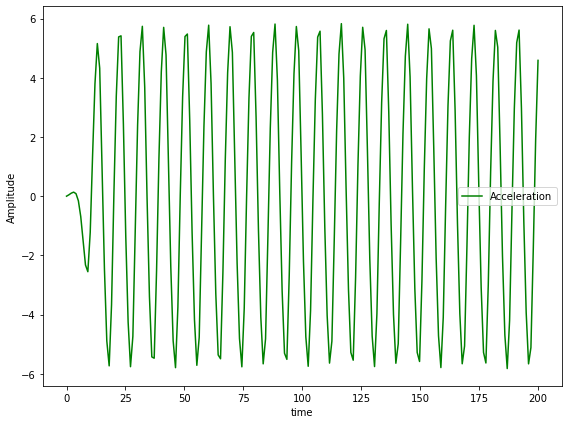

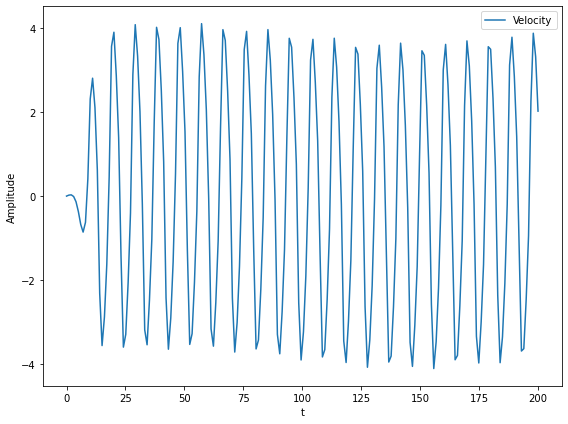

In [2]:
from scipy.integrate import odeint

Q = 2.0
d = 1.5
w = 0.65
omega = 2*np.pi

def derivative(X, t, Q,d,w,omega):
    return(X[1], (-(1/Q)*X[0])+np.sin(X[1])+d*np.cos(omega*t))

t = np.linspace(0, 200, 200)
Xinit = (0, 0)
X = odeint(derivative, Xinit, t, args=(Q,d,w,omega))

#Plotting theta as a function of time
plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label='Acceleration', c='g')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.tight_layout()
#Plotting w as a function of time
plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 1], label='Velocity')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend(loc='best')

plt.tight_layout()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

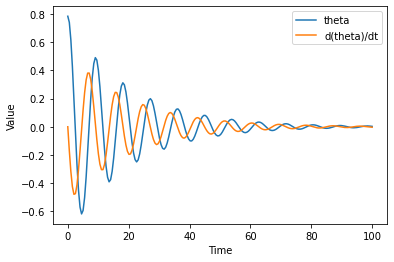

In [3]:
# Define the damped pendulum equation
# x[0] = theta, x[1] = d(theta)/dt
def damped_pendulum(x, t, b, c):
    return [x[1], -b*x[1] - c*np.sin(x[0])]

# Set the initial conditions
x0 = [np.pi/4, 0]

# Set the parameters
b = 0.1
c = 0.5

# Set the time range for the solution
t = np.linspace(0, 100, 200)

# Solve the ODE using odeint
solution = odeint(damped_pendulum, x0, t, args=(b, c))

# Unpack the solution array into theta and d(theta)/dt
theta = solution[:, 0]
dtheta_dt = solution[:, 1]

# Plot the solution
plt.plot(t, theta, label='theta')
plt.plot(t, dtheta_dt, label='d(theta)/dt')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

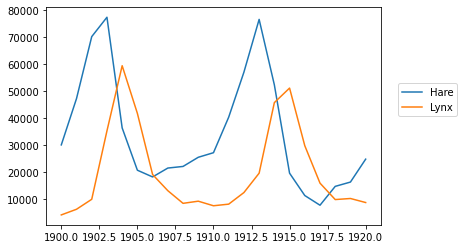

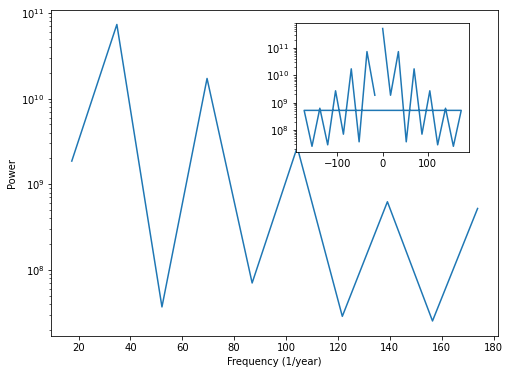

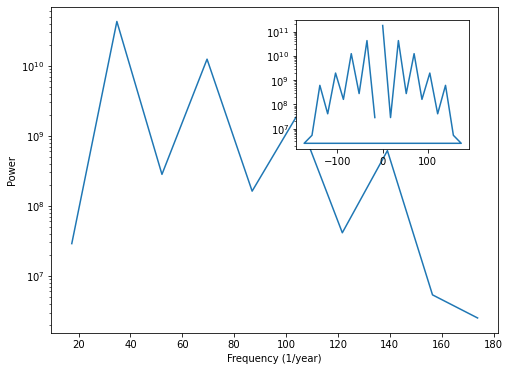

In [4]:
from scipy import fftpack
import pandas as pd
import numpy as np
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T

plt.plot(year, hares, year, lynxes) 
plt.legend(('Hare', 'Lynx'), loc=(1.05, 0.5))

hares_fft = fftpack.fft(hares)
hares_psd = np.abs(hares_fft) ** 2

fftfreq = fftpack.fftfreq(len(hares_psd), 1. / 365)

i = fftfreq > 0

plt.figure(figsize=(8, 6))
plt.plot(fftfreq[i], hares_psd[i])
plt.xlabel('Frequency (1/year)')
plt.ylabel('Power')
plt.yscale('log')

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.55, 0.3, 0.3])
plt.plot(fftfreq[:40], hares_psd[:40])
plt.setp(axes, yticks=[])
plt.yscale('log')

##Lynxes

lynxes_fft = fftpack.fft(lynxes)
lynxes_psd = np.abs(lynxes_fft) ** 2

fftfreq = fftpack.fftfreq(len(lynxes_psd), 1. / 365)

i = fftfreq > 0

plt.figure(figsize=(8, 6))
plt.plot(fftfreq[i], lynxes_psd[i])
plt.xlabel('Frequency (1/year)')
plt.ylabel('Power')
plt.yscale('log')

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.55, 0.3, 0.3])
plt.plot(fftfreq[:40], lynxes_psd[:40])
plt.setp(axes, yticks=[])
plt.yscale('log')